In [1]:
from struct import unpack
from pathlib import Path
from enum import Enum

import xmltodict
import numpy as np

import matplotlib.pyplot as plt

from astropy.time import Time
import astropy.units as u

from fass.ser import load_ser_file
from fass.sequence import Sequence

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
testfile = "/mnt/c/Users/tepic/Desktop/SharpCap Captures/2022-07-27/test/21_54_45.ser"
p = Path(testfile)

In [4]:
d = load_ser_file(testfile)

/home/tim/conda/envs/fass/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/tim/conda/envs/fass/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/tim/conda/envs/fass/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


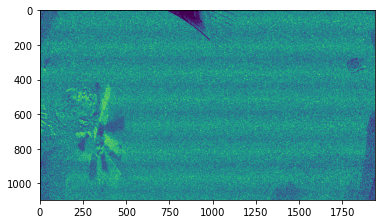

In [5]:
plt.imshow(d['data'][10, :, :] - d['data'][0, :, :])
plt.show()

In [6]:
import xmltodict
import json

In [7]:
with open("/home/tim/multi_test.esl", 'rb') as fp:
    d = xmltodict.parse(fp)
d

{'SchedulerList': {'@version': '1.5',
  'Profile': 'Default',
  'Job': [{'Name': 'Aldebaran',
    'Priority': '10',
    'Coordinates': {'J2000RA': '4.59867', 'J2000DE': '16.5098'},
    'PositionAngle': '-181',
    'Sequence': '/home/tim/test.esq',
    'StartupCondition': {'Condition': 'ASAP'},
    'Constraints': {'Constraint': [{'@value': '45',
       '#text': 'MinimumAltitude'},
      'EnforceTwilight',
      'EnforceArtificialHorizon']},
    'CompletionCondition': {'Condition': {'@value': '100', '#text': 'Repeat'}},
    'Steps': {'Step': 'Track'}},
   {'Name': 'Vega',
    'Priority': '10',
    'Coordinates': {'J2000RA': '18.6156', 'J2000DE': '38.783'},
    'PositionAngle': '-181',
    'Sequence': '/home/tim/test.esq',
    'StartupCondition': {'Condition': 'ASAP'},
    'Constraints': {'Constraint': [{'@value': '45',
       '#text': 'MinimumAltitude'},
      'EnforceTwilight',
      'EnforceArtificialHorizon']},
    'CompletionCondition': {'Condition': {'@value': '100', '#text': 'Repea

In [8]:
with open("sequence_list_template.json", 'w') as fp:
    json.dump(d, fp, indent=4)

In [11]:
s = Sequence()

In [12]:
s.config

{'SequenceQueue': {'@version': '2.3',
  'CCD': '',
  'FilterWheel': '',
  'GuideDeviation': {'@enabled': 'false', '#text': '2'},
  'GuideStartDeviation': {'@enabled': 'false', '#text': '2'},
  'Autofocus': {'@enabled': 'false', '#text': '0'},
  'RefocusOnTemperatureDelta': {'@enabled': 'false', '#text': '1'},
  'RefocusEveryN': {'@enabled': 'false', '#text': '60'},
  'RefocusOnMeridianFlip': {'@enabled': 'false'},
  'Job': {'Exposure': '1',
   'Format': 'Mono',
   'Encoding': 'FITS',
   'Binning': {'X': '1', 'Y': '1'},
   'Frame': {'X': '0', 'Y': '0', 'W': '1280', 'H': '1024'},
   'Temperature': {'@force': 'false', '#text': '0'},
   'Filter': '',
   'Type': 'Light',
   'Prefix': {'RawPrefix': None,
    'FilterEnabled': '0',
    'ExpEnabled': '0',
    'TimeStampEnabled': '0'},
   'Count': '2',
   'Delay': '30',
   'PostCaptureScript': '/home/tim/conda/envs/fass/bin/vid_capture',
   'FITSDirectory': '',
   'UploadMode': '0',
   'Properties': None,
   'Calibration': {'FlatSource': {'Type'